# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Install if not 

#! pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests 
from pprint import pprint


# Import API key
from config import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Build query URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1



## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Run Query Url out of the for loop
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=Imperial"


In [24]:
# Create empty lists 


weather_dict = []
city_two = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
    
for city in cities:
    city_url = query_url +"&q=" + city
    try: 
        
        
        response = requests.get(city_url).json()  
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        max_temp  = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        speed = response["wind"]['speed']
        country = response["sys"]["country"]
        cloud = response["clouds"]["all"]
        date = response["dt"]
        
        # Create a data frame from dictionary

        weather_dict.append({ "City":city,
                       "Cloudiness":cloud,
                       "Country":country,
                        "Date":date,
                       "Humidity":humidity,
                       "Lat":lat,
                       "Lng":lon,
                       "Max Temp":max_temp,
                      "Wind Speed":speed})
        
        if count_one > 50:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
            print(f"Processing Record {count_one} of Set {set_one} | {city}")    
          

    except Exception:
          print("City not found. Skipping...")
     
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | platikambos
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | emerald
Processing Record 5 of Set 1 | moose factory
Processing Record 6 of Set 1 | santiago de cuba
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | atocha
Processing Record 9 of Set 1 | raga
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | tornio
Processing Record 13 of Set 1 | nishihara
Processing Record 14 of Set 1 | kamskoye ustye
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | torbay
City not found. Skipping...
Processing Record 17 of Set 1 | boyolangu
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
city_df = pd.DataFrame(weather_dict)

In [26]:
# Display count

city_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [27]:
# show the top of the dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,platikambos,20,GR,1604783759,87,39.62,22.53,54.00,1.59
1,punta arenas,40,CL,1604783759,51,-53.15,-70.92,60.80,31.09
2,cape town,75,ZA,1604783760,82,-33.93,18.42,62.01,17.22
3,emerald,90,AU,1604783760,94,-23.53,148.17,71.01,9.17
4,moose factory,1,CA,1604783760,94,51.26,-80.61,32.00,12.75


In [28]:
# output data to csv
city_df.to_csv('weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

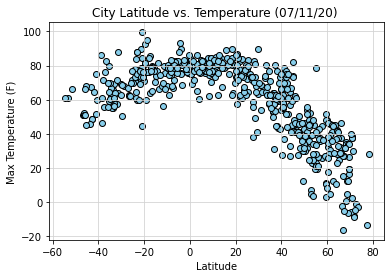

In [29]:
plt.scatter(city_df["Lat"],city_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Temperature (07/11/20) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

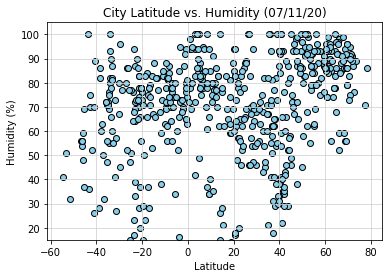

In [30]:
plt.scatter(city_df["Lat"],city_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (07/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

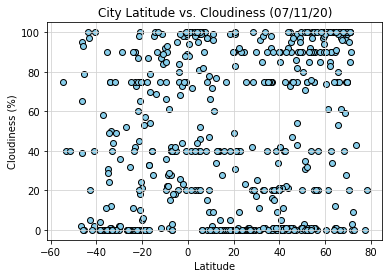

In [31]:
plt.scatter(city_df["Lat"],city_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (07/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

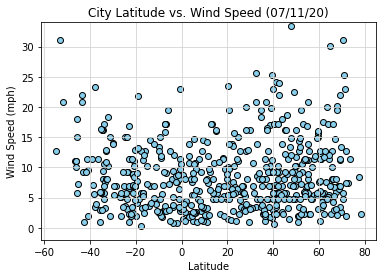

In [32]:
plt.scatter(city_df["Lat"],city_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (07/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()